# This dataset predicts passengers will survive on the titanic

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing dataset
titanic=pd.read_csv("train.csv")
titanic_test=pd.read_csv("test.csv")

#Print the first 10 rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Count the number of rows and columns in the dataset
titanic.shape

(891, 12)

In [4]:
#Finding the missing value in the dataset
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Drop the missing value from the dataset
titanic=titanic.drop(columns='Cabin',axis=1)

In [6]:
#Replace the missing value in "Age" column from the dataset
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [7]:
#Find the mode value of embarked column
print(titanic['Embarked'].mode())

0    S
dtype: object


In [8]:
#Replacing the missing value in "embarked" column with mode value
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [9]:
#Checking the NULL value in the dataset
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
#Description of the dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Count of the passengers who survived in titanic
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

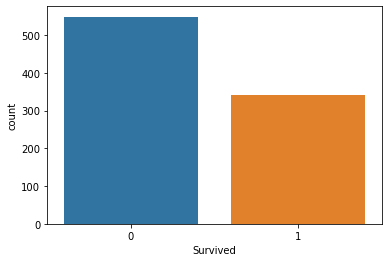

In [12]:
#Visualizing the count of survived passengers
sns.countplot(titanic['Survived'])

In [13]:
# Count the sex passengers who survived in titanic
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

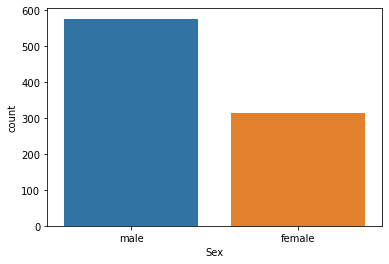

In [14]:
#Visualizing the 'SEX' count of survived passengers
sns.countplot(titanic['Sex'])

C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pragy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pragy\anaconda3\lib\si

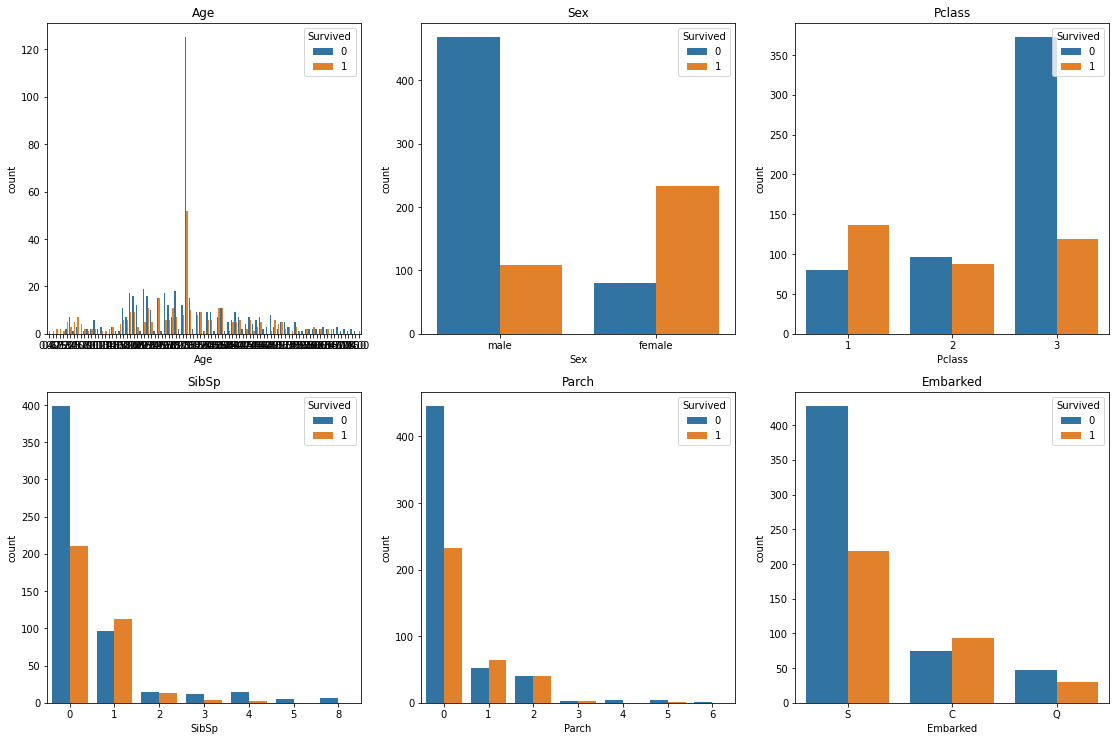

In [15]:
# Visualize the count of survivors for columns 'Sex','Pclass', 'SibSp', 'Parch', 'Embarked'.
cols=['Age','Sex','Pclass','SibSp','Parch','Embarked']

n_rows=2
n_cols=3

#The subplot grid and figure size of each graph.

fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*5.2,n_rows*5.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c # index to go through the number of columns
        ax=axs[r][c] # Show the position of each subplot
        sns.countplot(titanic[cols[i]],hue=titanic['Survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Survived',loc='upper right')

plt.tight_layout()

In [16]:
#Survival rate by sex
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [17]:
#Look at the Survival rate by sex and class
titanic.pivot_table('Survived',index='Sex',columns="Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

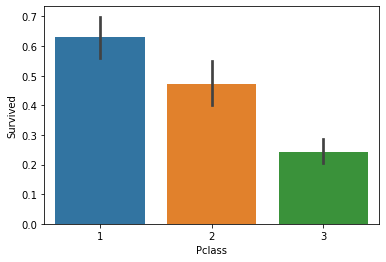

In [18]:
#Plot the survival rate of each class
sns.barplot(x='Pclass',y='Survived',data=titanic)

In [19]:
#Survival rate by sex,age and class
age= pd.cut(titanic['Age'],[0,18,80])
titanic.pivot_table('Survived',['Sex',age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.975904  0.903226  0.495050
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.350427  0.086022  0.121622

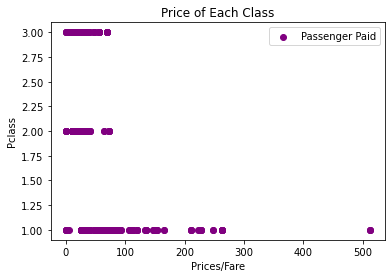

In [20]:
#Plot the prices paid of each class
plt.scatter(titanic['Fare'],titanic['Pclass'],color='purple',label='Passenger Paid')
plt.ylabel('Pclass')
plt.xlabel('Prices/Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [21]:
# Converting categorical values
titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

#Encode the sex column
titanic.iloc[:,4]=labelencoder.fit_transform(titanic.iloc[:,4].values)

#Encode the embarked column 
titanic.iloc[:,10]=labelencoder.fit_transform(titanic.iloc[:,10].values)

In [25]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

Seprating Features and Target

In [26]:
X=titanic.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=titanic['Survived']

In [27]:
#Split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

In [28]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
Y_test=sc.fit_transform(X_test)

In [29]:
#Create a function with many machine learning models
def models(X_train,Y_train):
    #Use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log= LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    #Use KNeighbours
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(X_train,Y_train)
    
    #Use SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    #Use SVC(RFB Kernal)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(X_train,Y_train)
    
    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,Y_train)
    
    #Use RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(X_train,Y_train)
    
    #Training Accuracy for each data
    print('[0]Logistic Regression Training accuracy: ',log.score(X_train,Y_train))
    print('[1]K Neighbour Training accuracy: ',knn.score(X_train,Y_train))
    print('[2]SVC Linear Training accuracy: ',svc_lin.score(X_train,Y_train))
    print('[3]SVC RBF Training accuracy: ',svc_rbf.score(X_train,Y_train))
    print('[4]Gaussian NB Training accuracy: ',gauss.score(X_train,Y_train))
    print('[5]Decision Tree Training accuracy: ',tree.score(X_train,Y_train))
    print('[6]Random Forest Training accuracy: ',forest.score(X_train,Y_train))
    
    return log,knn,svc_lin,svc_rbf,gauss,tree,forest

In [30]:
model=models(X_train,Y_train)

[0]Logistic Regression Training accuracy:  0.800561797752809
[1]K Neighbour Training accuracy:  0.8707865168539326
[2]SVC Linear Training accuracy:  0.7865168539325843
[3]SVC RBF Training accuracy:  0.8455056179775281
[4]Gaussian NB Training accuracy:  0.7921348314606742
[5]Decision Tree Training accuracy:  0.9817415730337079
[6]Random Forest Training accuracy:  0.9648876404494382


Using Random Forest Classifier to predict survival

In [31]:
#Use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
r_forest=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
r_forest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [32]:
titanic_test.drop(['Cabin','Name','Ticket','Fare'],axis=1,inplace=True)

In [33]:
# Converting categorical values
titanic_test.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [34]:
X_test=titanic_test

In [35]:
#Replace the missing value in "Age" column from the dataset
titanic_test['Age'].fillna(titanic_test['Age'].mean(), inplace=True)

In [36]:
final_predict=r_forest.predict(X_test)

In [37]:
output_df=pd.DataFrame({'PassengerId':titanic_test['PassengerId'], 'Survived':final_predict})

In [38]:
output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
